## Лабораторная работа №1 | Вариант 6

Выполнил: 

### 1. Numpy

In [4]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [2]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [5]:
np.diag([1]*4, -1) + np.diag([2]*3, -2) + np.diag([3]*2, -3) + np.diag([4]*1, -4)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [2, 1, 0, 0, 0],
       [3, 2, 1, 0, 0],
       [4, 3, 2, 1, 0]])

3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

При первом запуске мы получим вывод:
9
10

Так как сначала выполняется встроенная функция Python sum() и мы получаем ответ -1 + 0 + 1 + 2 + 3 + 4 = 9 (параметр -1 это первый элемент суммирования), потом импортируются все функции из numpy, в том числе sum(), и для нее уже параметр -1 это ось суммирования (так как массив 1D, то она игнорируется), поэтому получаем 0 + 1 + 2 + 3 + 4 = 10
При повторном запуске импорт numpy уже сохранился в ядре и мы будем получать одинаковый вывод для обоих sum():
10
10
Если же мы хотим снова получить 9 10 то надо будет перезапустить kernel

In [1]:
print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))

9
10


In [2]:
print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))

10
10


4. Как найти самое часто встречаемое значение между двумя массивами? 

Для этого сначала объединим два массива в один с помощью concatenate, потом применим bincount, получим новый массив где индексы это значения из исходного массива, а элементы это количество. Далее применим к нему argmax чтобы получить индекс наибольшего элемента - так мы и получим элемент из исходных двух массивов с максимальным числом вхождений.

In [5]:
a = np.array([1, 2, 3, 2, 3, 3, 4])
b = np.array([3, 3, 5, 3, 6, 3])
np.bincount(np.concatenate([a, b])).argmax()

np.int64(3)

5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

В примере мы сначала получаем предупреждение о делении на ноль, потом выключаем предупреждения и выполняем такой же код, и в конце ставим обратно all='warn' как оно стояло по умолчанию. Проверяем: получили два предупреждения и один раз код выполнился

In [6]:
np.array([1, 2, 3]) / 0

np.seterr(all='ignore')

np.array([1, 2, 3]) / 0

np.seterr(all='warn')

np.array([1, 2, 3]) / 0

/var/folders/yb/5gv57z_j5wg7s7mmyc2r7blr0000gn/T/ipykernel_87752/3902492120.py:1: RuntimeWarning: divide by zero encountered in divide
  np.array([1, 2, 3]) / 0
/var/folders/yb/5gv57z_j5wg7s7mmyc2r7blr0000gn/T/ipykernel_87752/3902492120.py:9: RuntimeWarning: divide by zero encountered in divide
  np.array([1, 2, 3]) / 0


array([inf, inf, inf])

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [7]:
def gen():
    for i in range(10):
        yield i

np.array(list(gen()))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

7. Создайте массив случайных чисел размером 10 и отсортируйте его

Если хотим случайные целые числа, то надо использовать np.random.randint(0, 100, 10)

In [8]:
np.sort(np.random.rand(10))

array([0.04371959, 0.16548647, 0.17903397, 0.18181781, 0.44110487,
       0.62980431, 0.68803457, 0.75292092, 0.9122239 , 0.95438886])

8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

Отдельно получаем два массива для радиусов и углов и после объединяем их в матрицу с помощью np.column_stack

In [ ]:
cartesian = np.random.rand(10, 2)
r = np.sqrt(cartesian[:, 0]**2 + cartesian[:, 1]**2)
theta = np.arctan2(cartesian[:, 1], cartesian[:, 0])
np.column_stack([r, theta])

array([[8.67510973e-01, 7.18620307e-04],
       [1.12849240e+00, 4.82983271e-01],
       [1.24283018e+00, 8.76814179e-01],
       [4.91613736e-01, 1.12276623e+00],
       [8.17447379e-01, 9.78193685e-01],
       [7.81651848e-01, 5.50572258e-01],
       [1.12328520e+00, 5.89909226e-01],
       [1.03806364e+00, 1.17996041e+00],
       [1.91816841e-01, 1.14609009e+00],
       [5.79308688e-01, 7.23883205e-01]])

9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

Для координат был выбран тип i4 == int32, для цвета u1 == uint8, структура данных для массива определяется с помощью dtype

In [ ]:
pixel = np.array([(100, 200, 255, 128, 64)], dtype=[('x', 'i4'), ('y', 'i4'), ('r', 'u1'), ('g', 'u1'), ('b', 'u1')])
pixel

10. Как конвертировать тип массив от float32 в int32 in place?

view работает in place, изменяет только интерпретацию данных

In [ ]:
arr = np.array([1.5, 2.7, 3.9], dtype='float32')
arr = arr.view('int32')
arr

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('student_perfomance.csv')

1. Посчитайте среднее кол-во часов уделяемое на сон студентами

Примерно 7ч

In [21]:
df['Sleep_Hours'].mean()

np.float64(7.029060087785682)

2. Сколько процентов студентов посещают внеклассовые активности?

Примерно 60%

In [22]:
(df['Extracurricular_Activities'] == 'Yes').mean() * 100

np.float64(59.60345088542455)

3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

Да, но в рамках погрешности

In [23]:
df.groupby('Gender')['Exam_Score'].mean()

Gender
Female    67.244898
Male      67.228894
Name: Exam_Score, dtype: float64

4. Выведите 25 и 75 перцентили времени сна студентов

Видим что 25% студентов спят меньше 6ч, 75% студентов спят меньше 8ч

In [24]:
df['Sleep_Hours'].quantile([0.25, 0.75])

0.25    6.0
0.75    8.0
Name: Sleep_Hours, dtype: float64

5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

Создаем две квантили 75 и 25 процентов, в первую помещаем все записи где Sleep_Hours больше, во вторую где меньше и считаем среднее по оценке экзамена.
Видим что средняя оценка почти не отличается (значит имеет смысл выспаться)

In [25]:
q25 = df['Sleep_Hours'].quantile(0.25)
q75 = df['Sleep_Hours'].quantile(0.75)
high_sleep = df[df['Sleep_Hours'] >= q75]['Exam_Score'].mean()
low_sleep = df[df['Sleep_Hours'] <= q25]['Exam_Score'].mean()
print(f'Много спят: {high_sleep:.2f}, Мало спят: {low_sleep:.2f}')

Много спят: 67.19, Мало спят: 67.28


6. Влияет ли физическая активность на результаты экзамена?

Влияет, но не значительно в пределах одного балла

In [26]:
df.groupby('Physical_Activity')['Exam_Score'].mean()

Physical_Activity
0    67.521739
1    66.969121
2    67.185003
3    67.196071
4    67.313016
5    67.603878
6    68.093750
Name: Exam_Score, dtype: float64

7. Правда ли, что студенты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

Да правда, но в пределах одного балла

In [27]:
higher_ed = df[df['Parental_Education_Level'].isin(['College', 'Postgraduate'])]['Exam_Score'].mean()
other_ed = df[~df['Parental_Education_Level'].isin(['College', 'Postgraduate'])]['Exam_Score'].mean()
print(f'Высшее образование: {higher_ed:.2f}, Остальные: {other_ed:.2f}')

Высшее образование: 67.58, Остальные: 66.90


8. Как влияет участие родителей на результаты экзаменов

In [28]:
df.groupby('Parental_Involvement')['Exam_Score'].mean()

Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64

9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

Да, правда, но опять в пределах одного балла

In [29]:
above_avg = df[df['Family_Income'].isin(['Medium', 'High'])]['Exam_Score'].mean()
below_avg = df[df['Family_Income'] == 'Low']['Exam_Score'].mean()
print(f'Выше среднего: {above_avg:.2f}, Низкий: {below_avg:.2f}')

Выше среднего: 67.50, Низкий: 66.85


10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

Среди таких семей 8% студентов сдали экзамен на более чем 70 баллов

In [30]:
filtered = df[(df['Family_Income'] == 'Low') & (df['Internet_Access'] == 'No')]
(filtered['Exam_Score'] > 70).mean()

np.float64(0.08056872037914692)

Интересно было сравнить с долей студентов из семей с высоким и средним доходом и с доступом в интернет:

In [ ]:
filtered = df[df['Family_Income'].isin(['Medium', 'High']) & (df['Internet_Access'] == 'No')]
(filtered['Exam_Score'] > 70).mean()

np.float64(0.10752688172043011)

Разница есть, таких студентов больше, но всего на 3%

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

Да, график похож на нормальное распределение

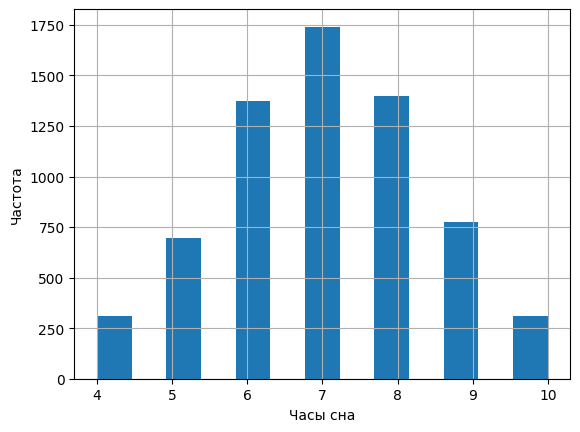

In [43]:
import matplotlib.pyplot as plt
df['Sleep_Hours'].hist(bins=13)
plt.xlabel('Часы сна')
plt.ylabel('Частота')
plt.show()

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

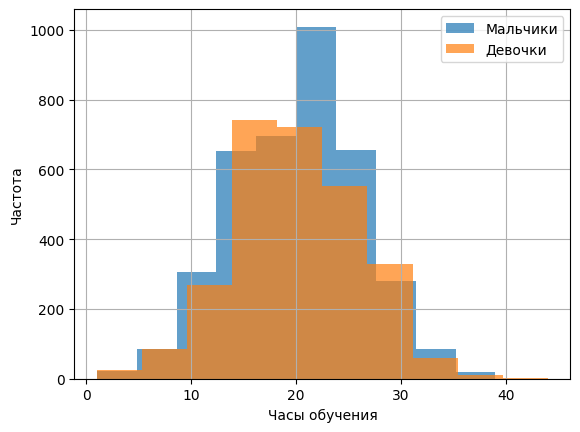

In [51]:
df[df['Gender'] == 'Male']['Hours_Studied'].hist(alpha=0.7, label='Мальчики')
df[df['Gender'] == 'Female']['Hours_Studied'].hist(alpha=0.7, label='Девочки')
plt.xlabel('Часы обучения')
plt.ylabel('Частота')
plt.legend()
plt.show()

3. Как зависит результат конечного экзамена от результата первого экзамена

Получив большую оценку за первый экзамен, вероятность получить большую оценку за последний увеличивается, но все равно оценки за него в большинстве случаев держатся в пределах 60-75 баллов

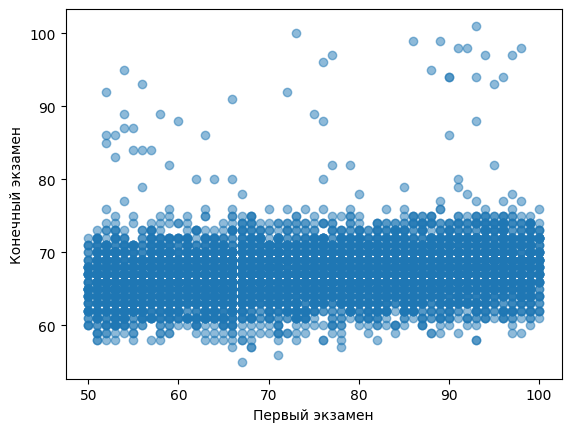

In [52]:
plt.scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.5)
plt.xlabel('Первый экзамен')
plt.ylabel('Конечный экзамен')
plt.show()

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

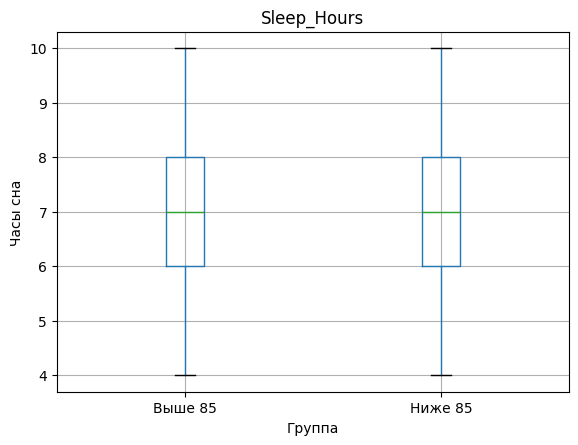

In [53]:
df['Group'] = df['Exam_Score'].apply(lambda x: 'Выше 85' if x > 85 else 'Ниже 85')
df.boxplot(column='Sleep_Hours', by='Group')
plt.suptitle('')
plt.xlabel('Группа')
plt.ylabel('Часы сна')
plt.show()

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

Почти не влияет

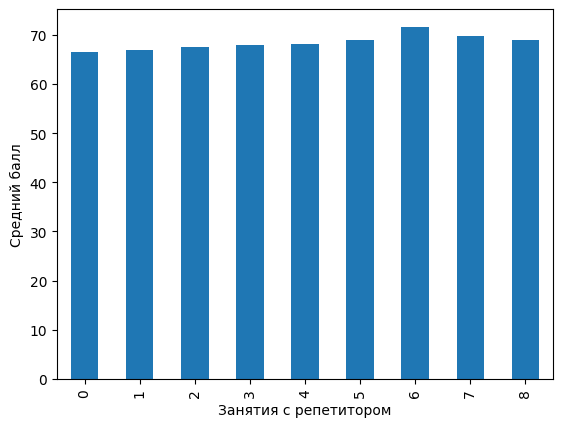

In [54]:
df.groupby('Tutoring_Sessions')['Exam_Score'].mean().plot(kind='bar')
plt.xlabel('Занятия с репетитором')
plt.ylabel('Средний балл')
plt.show()

6. Как физическая активность влияет на успеваемость?

Как мы уже видели ранее, физическая активность положительно влияет на результаты экзамена, но только в пределах одного балла

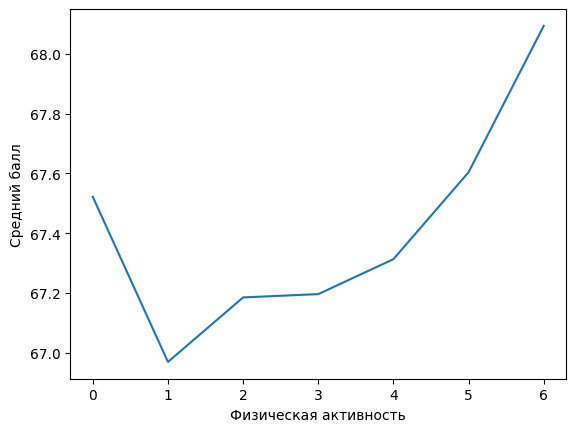

In [55]:
df.groupby('Physical_Activity')['Exam_Score'].mean().plot()
plt.xlabel('Физическая активность')
plt.ylabel('Средний балл')
plt.show()

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл

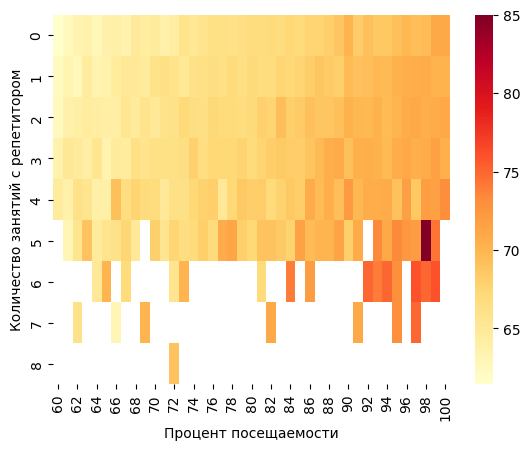

In [61]:
import seaborn as sns
pivot = df.pivot_table(values='Exam_Score', index='Tutoring_Sessions', columns='Attendance', aggfunc='mean')
sns.heatmap(pivot, cmap='YlOrRd')
plt.xlabel('Процент посещаемости')
plt.ylabel('Количество занятий с репетитором')
plt.show()